In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns
import sys
from wordcloud import WordCloud

In [2]:
print(WordCloud)

<class 'wordcloud.wordcloud.WordCloud'>


In [3]:
bachelor_contest = "C:/Users/Will/Downloads/archive.zip"
other_bachelor = "C:/Users/Will/Downloads/bachelor contestants for data.world.xlsx"
kaggle2 = "C:/Users/Will/Downloads/archive (1).zip"

In [4]:
bachelor_zf = zipfile.ZipFile(bachelor_contest)
bachelor_zf2 = zipfile.ZipFile(other_bachelor)

In [5]:
zf3 = zipfile.ZipFile(kaggle2) 
# if you want to see all files inside zip folder
zf3.namelist() 
# now read your csv file 
df_z = pd.read_csv(zf3.open('contestants.csv'))
df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Show        908 non-null    object 
 1   Season      908 non-null    int64  
 2   Name        908 non-null    object 
 3   Age         907 non-null    float64
 4   Hometown    908 non-null    object 
 5   Job         908 non-null    object 
 6   Eliminated  908 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 49.8+ KB


In [6]:
data_xls = pd.read_excel(other_bachelor, 'Contestants', index_col=None)
data_xls.to_csv('csvfile.csv', encoding='utf-8')
followers_df = data_xls
followers_df.head()

,Season,Name,Last Name,Followers(k),Age,City,State,Country,Occupation,Outcome,Elimination_Week,Place,Note,Was_Bachelorette
0,18,Christy,Hansen,0.148,24.0,Aurora,Illinois,USA,Marketing Manager,Week 3,3,14.0,NaN,0
1,19,Reegan,Cornwell,0.566,28.0,Manhattan Beach,California,USA,Cadaver Tissue Saleswoman,Week 1,1,24.0,NaN,0
2,18,Amy,Jokinen,0.640,31.0,Apopka,Florida,USA,Massage Therapist,Week 1,1,19.0,NaN,0
3,18,Ashley,Poe,0.673,25.0,Roanoke,Texas,USA,Grade School Teacher,Week 1,1,19.0,NaN,0
4,19,Nikki,Delventhal,0.807,26.0,Hasbrouck Heights,New Jersey,USA,Former NFL Cheerleader,Week 4,4,12.0,NaN,0


In [7]:
df1 = pd.read_csv(bachelor_zf. open('bachelor-contestants.csv'))
df1.head()

,Name,Age,Occupation,Hometown,Height,ElimWeek,Season
0,Amanda Marsh,23.0,Event Planner,"Chanute, Kansas",NaN,NaN,1
1,Trista Rehn,29.0,Miami Heat Dancer,"Miami, Florida",NaN,6.0,1
2,Shannon Oliver,24.0,Financial Management Consultant,"Dallas, Texas",NaN,5.0,1
3,Kim,24.0,Nanny,"Tempe, Arizona",NaN,4.0,1
4,Cathy Grimes,22.0,Graduate Student,"Terra Haute, Indiana",NaN,3.0,1


In [8]:
df1 = df1.merge(followers_df, how='left')
df1.head()

,Name,Age,Occupation,Hometown,Height,ElimWeek,Season,Last Name,Followers(k),City,State,Country,Outcome,Elimination_Week,Place,Note,Was_Bachelorette
0,Amanda Marsh,23.0,Event Planner,"Chanute, Kansas",NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Trista Rehn,29.0,Miami Heat Dancer,"Miami, Florida",NaN,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Shannon Oliver,24.0,Financial Management Consultant,"Dallas, Texas",NaN,5.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kim,24.0,Nanny,"Tempe, Arizona",NaN,4.0,1,NaN,NaN,Tempe,Arizona,USA,Week 4,4.0,NaN,NaN,0.0
4,Cathy Grimes,22.0,Graduate Student,"Terra Haute, Indiana",NaN,3.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df1 = df1.merge(df_z, how='left', left_index=False)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 422
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              423 non-null    object 
 1   Age               422 non-null    float64
 2   Occupation        423 non-null    object 
 3   Hometown          423 non-null    object 
 4   Height            30 non-null     float64
 5   ElimWeek          406 non-null    float64
 6   Season            423 non-null    int64  
 7   Last Name         32 non-null     object 
 8   Followers(k)      26 non-null     float64
 9   City              74 non-null     object 
 10  State             74 non-null     object 
 11  Country           74 non-null     object 
 12  Outcome           74 non-null     object 
 13  Elimination_Week  74 non-null     float64
 14  Place             34 non-null     float64
 15  Note              2 non-null      object 
 16  Was_Bachelorette  74 non-null     float64
 1

In [10]:
df2 = df1.drop(['Last Name', 'Show', 'Job', 'Eliminated', 'Height', 'City', 'State', 'Country', 'Outcome', 'Elimination_Week', 'Was_Bachelorette', 'Note', 'Place'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 422
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          423 non-null    object 
 1   Age           422 non-null    float64
 2   Occupation    423 non-null    object 
 3   Hometown      423 non-null    object 
 4   ElimWeek      406 non-null    float64
 5   Season        423 non-null    int64  
 6   Followers(k)  26 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 26.4+ KB


In [26]:
df2['ElimWeek'] = df2['ElimWeek'].fillna('Quit')

In [11]:
# df2 = pd.read_csv(bachelor_zf. open('bachelorette-contestants.csv'))
# df3 = pd.read_csv(bachelor_zf. open('bachelorettes.csv'))
# df4 = pd.read_csv(bachelor_zf. open('bachelors.csv'))

In [27]:
df2.sort_values(by='Age')

,Name,Age,Occupation,Hometown,ElimWeek,Season,Followers(k),Age_groups
71,Jessica Kyron,21.0,Student,"Cincinnati, Ohio",1.0,5,NaN,Early 20s
344,Mackenzie Deonigi,21.0,Dental Assistant,"Maple Valley, Washington",5.0,19,NaN,Early 20s
45,Fatima,22.0,College Student,"Long Beach, California",1.0,2,NaN,Early 20s
18,Jackie,22.0,Bar Manager,"Pittsburgh, Pennsylvania",1.0,1,NaN,Early 20s
315,Cassandra Ferguson,22.0,Former NBA Dancer,"Shelby Charter Township, Michigan",6.0,18,NaN,Early 20s
...,...,...,...,...,...,...,...,...
279,Holly Johnson,34.0,Pharmaceutical sales representative,"Salyersville, Kentucky",1.0,16,NaN,Early 30s
281,Shira Astrof,35.0,Actress,"Massapequa Park, New York",1.0,16,NaN,Late 30s
151,Susan Stein,35.0,Project analyst,"St. Charles, Illinois",1.0,11,NaN,Late 30s
198,Renee Simlak,36.0,Jewelry Designer,"Southfield, Michigan",1.0,13,NaN,Late 30s


In [82]:
count = 1
df2['count'] = count

In [13]:
#21-24, 25-29, 30-33, 34-37

In [83]:
bins = [0, 24, 29, 34, 39]
age_groups = ['Early 20s', 'Late 20s', 'Early 30s', 'Late 30s']

df2['Age_groups'] = pd.cut(df2['Age'], bins, labels=age_groups, include_lowest=True)
df2

,Name,Age,Occupation,Hometown,ElimWeek,Season,Followers(k),Age_groups,count
0,Amanda Marsh,23.0,Event Planner,"Chanute, Kansas",Quit,1,NaN,Early 20s,1
1,Trista Rehn,29.0,Miami Heat Dancer,"Miami, Florida",6.0,1,NaN,Late 20s,1
2,Shannon Oliver,24.0,Financial Management Consultant,"Dallas, Texas",5.0,1,NaN,Early 20s,1
3,Kim,24.0,Nanny,"Tempe, Arizona",4.0,1,NaN,Early 20s,1
4,Cathy Grimes,22.0,Graduate Student,"Terra Haute, Indiana",3.0,1,NaN,Early 20s,1
...,...,...,...,...,...,...,...,...,...
418,Sarah,26.0,Grade School Teacher,"Newport Beach, CA",4.0,21,217.000,Late 20s,1
419,Susannah,26.0,Account Manager,"San Diego, CA",1.0,21,1.097,Late 20s,1
420,Taylor,23.0,Mental Health Counselor,"Seattle, WA",5.0,21,47.300,Early 20s,1
421,Vanessa,29.0,Special Education Teacher,"Montreal, Quebec, Canada",Quit,21,941.000,Late 20s,1


In [84]:
age_means = df2.groupby(['Age_groups', 'ElimWeek'], as_index=False).sum()
age_means.head(20)

,Age_groups,ElimWeek,Age,Season,Followers(k),count
0,Early 20s,1.0,887.0,466,3.361,38
1,Early 20s,2.0,307.0,172,13.215,13
2,Early 20s,3.0,346.0,124,0.000,15
3,Early 20s,4.0,256.0,128,0.000,11
4,Early 20s,5.0,303.0,196,329.900,13
5,Early 20s,6.0,187.0,123,0.000,8
6,Early 20s,7.0,187.0,109,311.000,8
7,Early 20s,8.0,72.0,50,735.000,3
8,Early 20s,9.0,24.0,20,0.000,1
9,Early 20s,10.0,48.0,37,0.000,2


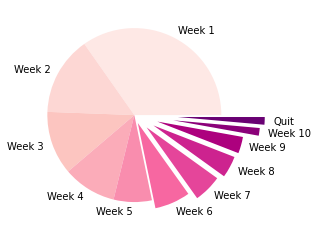

In [44]:
label = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Quit']
explode = (0, 0, 0, 0, 0, 0.1, 0.2, 0.25, 0.275, 0.45, 0.5)
plt.pie(counts, labels = label, explode=explode, colors=sb.color_palette("RdPu", 
                                     len(label)))

plt.show()

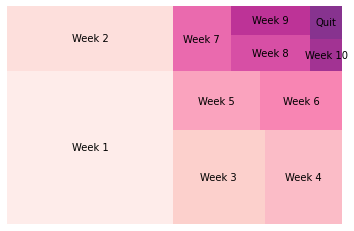

In [33]:
import matplotlib.pyplot as plt
import squarify    
import pandas as pd
import seaborn as sb

# Create a data frame with fake data
treemap_df = df2['ElimWeek'].value_counts(dropna=True)
label = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Quit']
# plot it
squarify.plot(sizes=treemap_df, label=label, color=sb.color_palette("RdPu", 
                                     len(label)), alpha=.8 )
plt.axis('off')
plt.show()

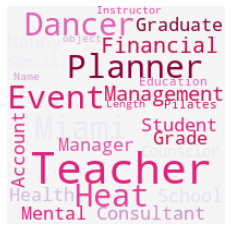

In [19]:
#Word Cloud for occupations


# Create a list of word
text=(str(df2['Occupation']))

# Create the wordcloud object
wordcloud = WordCloud(width=200, height=200, max_words=50, margin=0, stopwords=['Occupation', 'dtype'], background_color="whitesmoke", colormap='PuRd_r').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [50]:
counts = df2['ElimWeek'].value_counts()
age_counts = df2['Age_groups'].value_counts()
age_counts

Late 20s     247
Early 20s    117
Early 30s     55
Late 30s       3
Name: Age_groups, dtype: int64

In [85]:
#Try and isolate the age groups and use small multiples to get four
#graphs showing the amount of eliminations per week per group.
age_means.head()


,Age_groups,ElimWeek,Age,Season,Followers(k),count
0,Early 20s,1.0,887.0,466,3.361,38
1,Early 20s,2.0,307.0,172,13.215,13
2,Early 20s,3.0,346.0,124,0.000,15
3,Early 20s,4.0,256.0,128,0.000,11
4,Early 20s,5.0,303.0,196,329.900,13
